In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
np.random.seed(52)

In [3]:
df = pd.read_csv('digit_data.csv')

In [4]:
df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = np.array(df)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into abc and training sets

data_abc = data[0:1000].T
Y_abc = data_abc[0]
X_abc = data_abc[1:n]
X_abc = X_abc / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [6]:
Y_train

array([3, 4, 4, ..., 5, 1, 5], dtype=int64)

In [7]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    
    
    W2 = np.random.rand(15, 10) - 0.5
    b2 = np.random.rand(15, 1) - 0.5
    
    W3 = np.random.rand(12,15) - 0.5
    b3 = np.random.rand(12, 1) - 0.5
    
    W4 = np.random.rand(10,12) - 0.5
    b4 = np.random.rand(10, 1) - 0.5
    
    return W1, b1, W2, b2, W3, b3, W4, b4


In [8]:
def init_params_kaiming():
    def kaiming_initializer(n_in):
        return np.random.normal(0, np.sqrt(2 / n_in))

    W1 = kaiming_initializer(784) * np.random.randn(10, 784)
    b1 = np.zeros((10, 1))
    
    W2 = kaiming_initializer(10) * np.random.randn(15, 10)
    b2 = np.zeros((15, 1))
    
    W3 = kaiming_initializer(15) * np.random.randn(12, 15)
    b3 = np.zeros((12, 1))
    
    W4 = kaiming_initializer(12) * np.random.randn(10, 12)
    b4 = np.zeros((10, 1))
    
    return W1, b1, W2, b2, W3, b3, W4, b4

In [9]:

def init_params_xavier():
    def xavier_initializer(n_in, n_out):
        bound = np.sqrt(6 / (n_in + n_out))
        return np.random.uniform(-bound, bound)

    W1 = xavier_initializer(784, 10) * np.random.rand(10, 784)
    b1 = np.random.rand(10, 1) - 0.5
    
    W2 = xavier_initializer(10, 15) * np.random.rand(15, 10)
    b2 = np.random.rand(15, 1) - 0.5
    
    W3 = xavier_initializer(15, 12) * np.random.rand(12, 15)
    b3 = np.random.rand(12, 1) - 0.5
    
    W4 = xavier_initializer(12, 10) * np.random.rand(10, 12)
    b4 = np.random.rand(10, 1) - 0.5
    
    return W1, b1, W2, b2, W3, b3, W4, b4


In [10]:
def ReLU(Z):
    return np.maximum(Z, 0)


In [11]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [12]:
def ReLU_deriv(Z):
    return Z > 0


In [13]:
def sigmoid(x):
  
    return 1 / (1 + np.exp(-x))

In [14]:
def tanh(x):
   
    return np.tanh(x)

In [15]:
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [16]:
def tanh_derivative(x):
    return 1 - tanh(x)**2

In [17]:
def forward_prop(W1, b1, W2, b2,W3,b3,W4,b4, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    
    Z2 = W2.dot(A1) + b2
    A2 = sigmoid(Z2)
    
    Z3 = W3.dot(A2) + b3
    A3 = tanh(Z3)
    
    Z4 = W4.dot(A3) + b4
    A4 = softmax(Z4)
    return Z1, A1, Z2, A2, Z3,A3,Z4,A4

In [18]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y


In [19]:
def backward_prop(Z1, A1, Z2, A2, Z3, A3, Z4,A4, W1, W2,W3,W4, X, Y):
    one_hot_Y = one_hot(Y)
    
    dZ4 = A4 - one_hot_Y
    dW4 = 1 / m * dZ4.dot(A3.T)
    db4 = 1 / m * np.sum(dZ4)
    
    dZ3 = W4.T.dot(dZ4) * tanh_derivative(Z3)
    dW3 = 1 / m * dZ3.dot(A2.T)
    db3 = 1 / m * np.sum(dZ3)
    
    dZ2 = W3.T.dot(dZ3) * sigmoid_derivative(Z2)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    
    
    
    
    return dW1, db1, dW2, db2, dW3, db3, dW4,db4

In [20]:

def update_params(W1, b1, W2, b2,W3,b3,W4,b4, dW1, db1, dW2, db2,dW3,db3,dW4,db4, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2 
    
    W3 = W3 - alpha * dW3
    b3 = b3 - alpha * db3    
    
    W4 = W4 - alpha * dW4  
    b4 = b4 - alpha * db4 
    
    return W1, b1, W2, b2, W3, b3, W4, b4

In [21]:
def get_predictions(A2):
    return np.argmax(A2, 0)


In [22]:
def get_accuracy(predictions, Y):
    #print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [23]:

#xavier initilization
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2, W3, b3, W4, b4 = init_params_xavier()
    accuracy_scores = []  # To store accuracy scores at different iterations
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3, Z4, A4 = forward_prop(W1, b1, W2, b2,W3,b3,W4,b4, X)
        dW1, db1, dW2, db2, dW3, db3, dW4,db4 = backward_prop(Z1, A1, Z2, A2, Z3, A3, Z4,A4, W1, W2,W3,W4, X, Y)
        W1, b1, W2, b2, W3, b3, W4, b4 = update_params(W1, b1, W2, b2,W3,b3,W4,b4, dW1, db1, dW2, db2,dW3,db3,dW4,db4, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A4)
            accuracy = get_accuracy(predictions, Y)
            print(accuracy)
            accuracy_scores.append((i, accuracy))
    # Convert accuracy_scores to separate lists for plotting
    iterations, accuracies = zip(*accuracy_scores)
    
    # Plotting accuracy vs iterations
    plt.plot(iterations, accuracies)
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Iterations')
    legend_handles = [
        plt.Line2D([], [], marker='o', color='w', label='THA076BEI009\nTHA076BEI036', markersize=10, markerfacecolor='black', alpha=0)
    ]
    plt.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.84, 1.12))  # Adjust the bbox_to_anchor values

    plt.show()
    
    return W1, b1, W2, b2, W3,b3,W4,b4

Iteration:  0
0.09034146341463414
Iteration:  10
0.09034146341463414
Iteration:  20
0.09034146341463414
Iteration:  30
0.09034146341463414
Iteration:  40
0.09034146341463414
Iteration:  50
0.09851219512195122
Iteration:  60
0.11146341463414634
Iteration:  70
0.11146341463414634
Iteration:  80
0.11146341463414634
Iteration:  90
0.11146341463414634
Iteration:  100
0.11146341463414634
Iteration:  110
0.11146341463414634
Iteration:  120
0.11146341463414634
Iteration:  130
0.11146341463414634
Iteration:  140
0.11146341463414634
Iteration:  150
0.11146341463414634
Iteration:  160
0.11146341463414634
Iteration:  170
0.11146341463414634
Iteration:  180
0.11146341463414634
Iteration:  190
0.11146341463414634
Iteration:  200
0.11146341463414634
Iteration:  210
0.11146341463414634
Iteration:  220
0.11146341463414634
Iteration:  230
0.11146341463414634
Iteration:  240
0.11146341463414634
Iteration:  250
0.11146341463414634
Iteration:  260
0.11146341463414634
Iteration:  270
0.11146341463414634
Ite

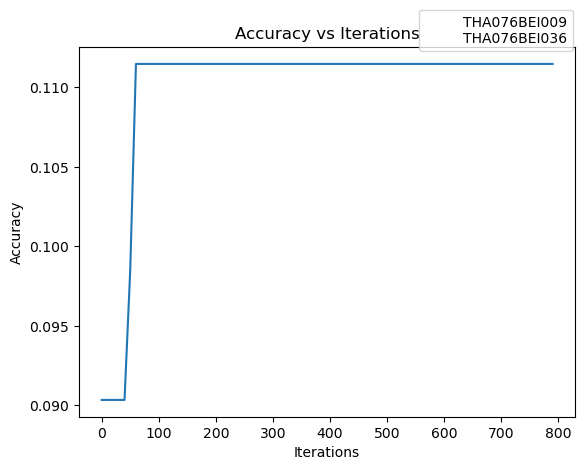

In [24]:
W1, b1, W2, b2, W3,b3,W4,b4 = gradient_descent(X_train, Y_train, 0.10, 800)

In [25]:
def make_predictions(X, W1, b1, W2, b2,W3,b3,W4,b4):
    Z1, A1, Z2, A2, Z3,A3,Z4,A4 = forward_prop(W1, b1, W2, b2,W3,b3,W4,b4, X)
    predictions = get_predictions(A4)
    return predictions

def test_prediction(index, W1, b1, W2, b2,W3,b3,W4,b4):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2,W3,b3,W4,b4)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    legend_handles = [
        plt.Line2D([], [], marker='o', color='w', label='THA076BEI009\nTHA076BEI036', markersize=10, markerfacecolor='black', alpha=0)
    ]
    plt.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.84, 1.12))  # Adjust the bbox_to_anchor values

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  3


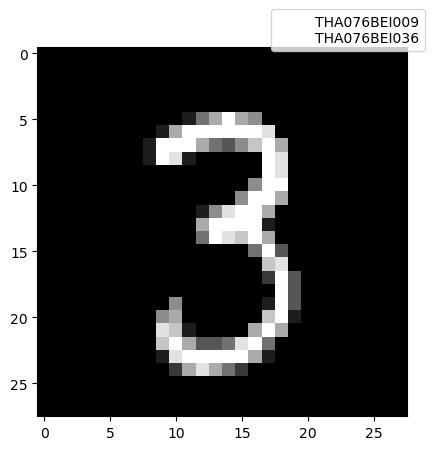

In [26]:
test_prediction(0, W1, b1, W2, b2,W3,b3,W4,b4)




Prediction:  [1]
Label:  4


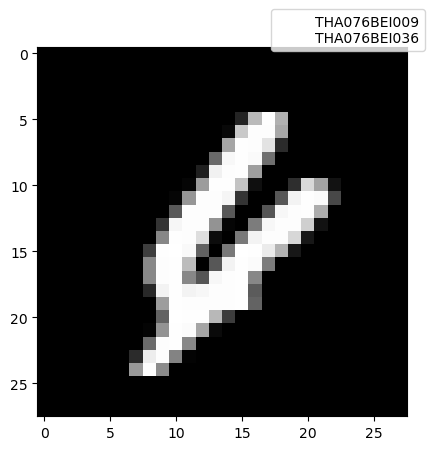

In [27]:
test_prediction(1, W1, b1, W2, b2,W3,b3,W4,b4)

Prediction:  [1]
Label:  4


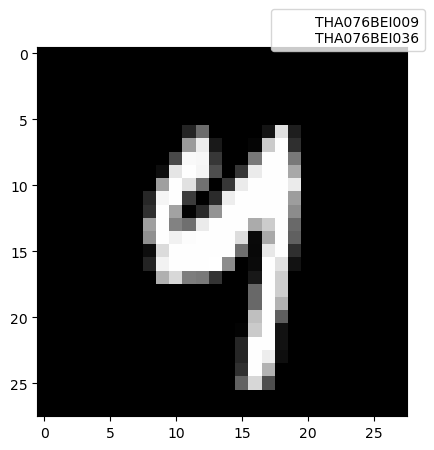

In [28]:
test_prediction(2, W1, b1, W2, b2,W3,b3,W4,b4)

Prediction:  [1]
Label:  2


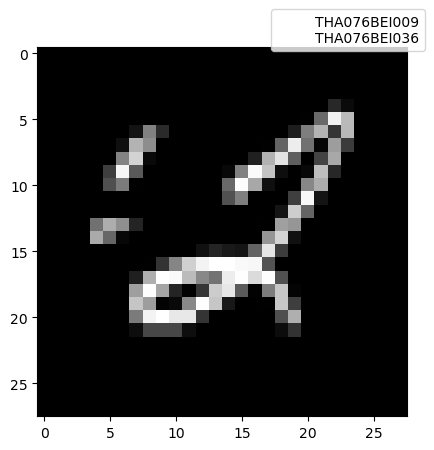

In [29]:
test_prediction(3, W1, b1, W2, b2,W3,b3,W4,b4)

In [30]:
abc_predictions = make_predictions(X_abc, W1, b1, W2, b2, W3, b3, W4, b4)
get_accuracy(abc_predictions, Y_abc)

0.114

In [31]:
from sklearn.metrics import classification_report

abc_predictions = make_predictions(X_abc, W1, b1, W2, b2, W3, b3, W4, b4)
report = classification_report(abc_predictions,Y_abc, digits=4)

print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         0
           1     1.0000    0.1140    0.2047      1000
           2     0.0000    0.0000    0.0000         0
           3     0.0000    0.0000    0.0000         0
           4     0.0000    0.0000    0.0000         0
           5     0.0000    0.0000    0.0000         0
           6     0.0000    0.0000    0.0000         0
           7     0.0000    0.0000    0.0000         0
           8     0.0000    0.0000    0.0000         0
           9     0.0000    0.0000    0.0000         0

    accuracy                         0.1140      1000
   macro avg     0.1000    0.0114    0.0205      1000
weighted avg     1.0000    0.1140    0.2047      1000



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
#KAIMING INITIALIZAION
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2, W3, b3, W4, b4 = init_params_kaiming()
    accuracy_scores = []
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3, Z4, A4 = forward_prop(W1, b1, W2, b2,W3,b3,W4,b4, X)
        dW1, db1, dW2, db2, dW3, db3, dW4,db4 = backward_prop(Z1, A1, Z2, A2, Z3, A3, Z4,A4, W1, W2,W3,W4, X, Y)
        W1, b1, W2, b2, W3, b3, W4, b4 = update_params(W1, b1, W2, b2,W3,b3,W4,b4, dW1, db1, dW2, db2,dW3,db3,dW4,db4, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A4)
            accuracy = get_accuracy(predictions, Y)
            print(accuracy)
            accuracy_scores.append((i, accuracy))
    
    # Convert accuracy_scores to separate lists for plotting
    iterations, accuracies = zip(*accuracy_scores)
    legend_handles = [
        plt.Line2D([], [], marker='o', color='w', label='THA076BEI009\nTHA076BEI036', markersize=10, markerfacecolor='black', alpha=0)
    ]
    plt.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.84, 1.12))  # Adjust the bbox_to_anchor values

    # Plotting accuracy vs iterations
    plt.plot(iterations, accuracies)
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Iterations')
    plt.show()
    
    return W1, b1, W2, b2, W3,b3,W4,b4

Iteration:  0
0.09073170731707317
Iteration:  10
0.23829268292682926
Iteration:  20
0.4553170731707317
Iteration:  30
0.49841463414634146
Iteration:  40
0.5240487804878049
Iteration:  50
0.5505365853658537
Iteration:  60
0.5770975609756097
Iteration:  70
0.6019268292682927
Iteration:  80
0.6261951219512195
Iteration:  90
0.6491463414634147
Iteration:  100
0.6699756097560976
Iteration:  110
0.6911951219512195
Iteration:  120
0.7121951219512195
Iteration:  130
0.7322439024390244
Iteration:  140
0.7504390243902439
Iteration:  150
0.7684390243902439
Iteration:  160
0.7837560975609756
Iteration:  170
0.7951707317073171
Iteration:  180
0.8057804878048781
Iteration:  190
0.8138536585365853
Iteration:  200
0.8210975609756097
Iteration:  210
0.8274146341463414
Iteration:  220
0.8333170731707317
Iteration:  230
0.8383658536585366
Iteration:  240
0.8426585365853658
Iteration:  250
0.8465853658536585
Iteration:  260
0.8500731707317073
Iteration:  270
0.8530731707317073
Iteration:  280
0.8560243902

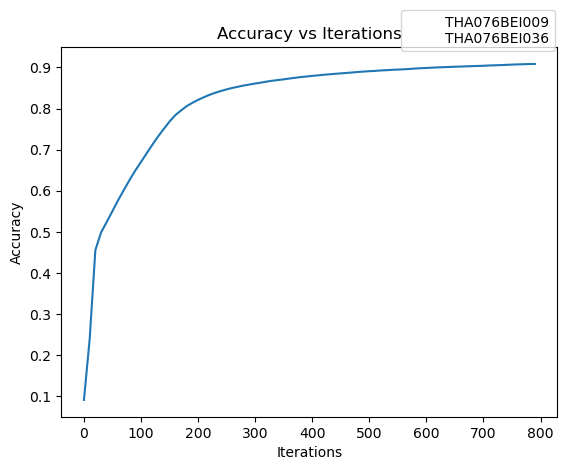

In [33]:
W1, b1, W2, b2, W3,b3,W4,b4 = gradient_descent(X_train, Y_train, 0.10, 800)

Prediction:  [3]
Label:  3


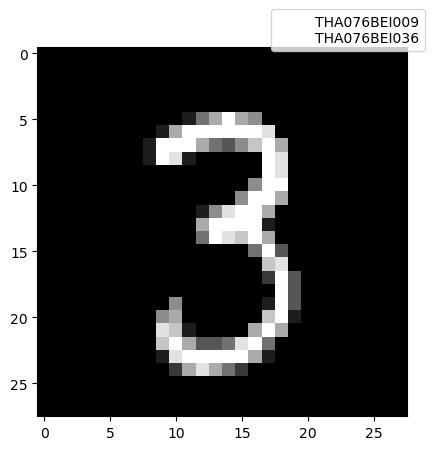

Prediction:  [6]
Label:  4


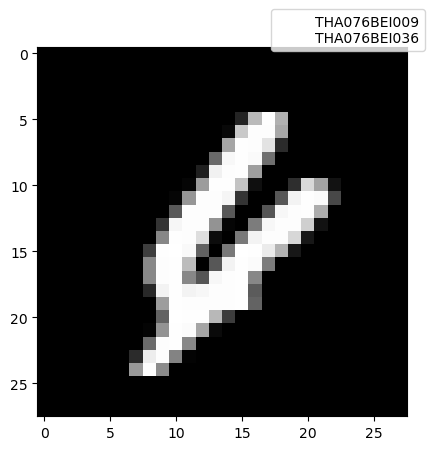

Prediction:  [9]
Label:  4


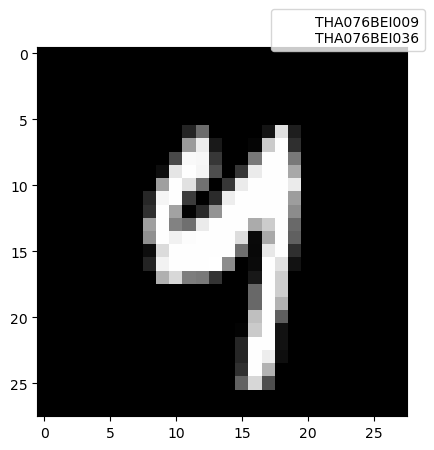

Prediction:  [1]
Label:  2


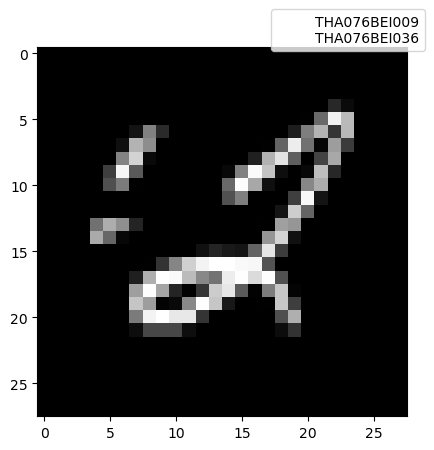

In [34]:
test_prediction(0, W1, b1, W2, b2,W3,b3,W4,b4)
test_prediction(1, W1, b1, W2, b2,W3,b3,W4,b4)
test_prediction(2, W1, b1, W2, b2,W3,b3,W4,b4)
test_prediction(3, W1, b1, W2, b2,W3,b3,W4,b4)

In [35]:
abc_predictions = make_predictions(X_abc, W1, b1, W2, b2, W3, b3, W4, b4)
get_accuracy(abc_predictions, Y_abc)

0.903

In [36]:
from sklearn.metrics import classification_report

abc_predictions = make_predictions(X_abc, W1, b1, W2, b2, W3, b3, W4, b4)
report = classification_report(abc_predictions,Y_abc, digits=4)

print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0     0.9892    0.9485    0.9684        97
           1     0.9737    0.9737    0.9737       114
           2     0.9439    0.9266    0.9352       109
           3     0.9143    0.8727    0.8930       110
           4     0.9247    0.8866    0.9053        97
           5     0.8242    0.9146    0.8671        82
           6     0.9247    0.8958    0.9101        96
           7     0.8600    0.8350    0.8473       103
           8     0.8700    0.8969    0.8832        97
           9     0.7981    0.8737    0.8342        95

    accuracy                         0.9030      1000
   macro avg     0.9023    0.9024    0.9017      1000
weighted avg     0.9053    0.9030    0.9036      1000

